# Importing Libraries


In [226]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [227]:
import pickle 
import random 

In [228]:
train_data = open('Data/train.p','rb')
train = pickle.load(train_data)
val_data = open('./Data/valid.p','rb')
val = pickle.load(val_data)
test_data = open('./Data/test.p','rb')
test = pickle.load(test_data)

In [229]:
x_train,y_train = train['features'],train['labels']
x_val,y_val = val['features'],val['labels']
x_test,y_test = test['features'],test['labels']

In [230]:
x_train.shape

(34799, 32, 32, 3)

In [231]:
y_train.shape

(34799,)

# Data Visualization

31

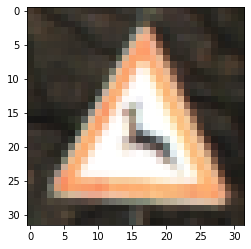

In [232]:
i = random.randint(1,len(x_train))
plt.imshow(x_train[i])
y_train[i]

34799


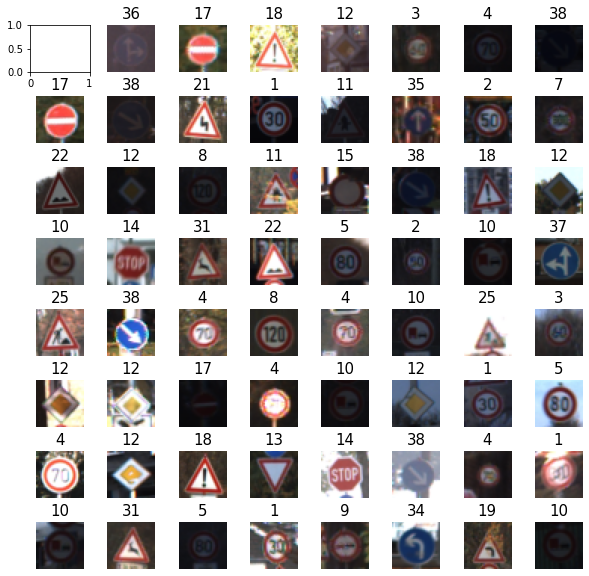

In [233]:
fig,axes = plt.subplots(8,8,figsize=(10,10))
axes = axes.ravel()
m = len(x_train)
print(m)

#Random Visualization of Traffic Signals
for i in np.arange(1,64):
    j = random.randint(1,m)
    axes[i].imshow(x_train[j])
    axes[i].set_title(y_train[j],fontsize=15)
    axes[i].axis('off')

    
plt.subplots_adjust(hspace=0.5)

# Grayscale and Normalization

In [234]:
#Shuffling of the dataset just to make sure that model doesn't learn the order of the images 
from sklearn.utils import shuffle
x_train,y_train =shuffle(x_train,y_train)

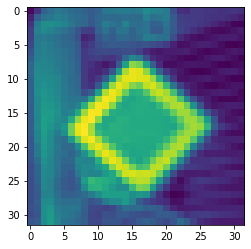

In [235]:
X_train=tf.image.rgb_to_grayscale(x_train)
X_val=tf.image.rgb_to_grayscale(x_val)
X_test=tf.image.rgb_to_grayscale(x_test)
plt.imshow(X_train[5])

In [236]:
X_train= X_train/255
X_val= X_val/255
X_test= X_test/255


In [237]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, 43)
Y_val = to_categorical(y_val,43)
Y_test = to_categorical(y_test, 43)

In [238]:
X_train.shape

TensorShape([34799, 32, 32, 1])

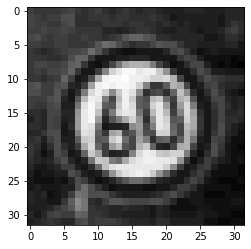

In [239]:
plt.figure()
plt.imshow(X_train[53],cmap='gray')


# Deep Convolutional Network

In [240]:
from tensorflow.keras import models,datasets,layers
CNN = models.Sequential()
CNN.add(layers.Conv2D(10,(5,5),activation='relu',input_shape=X_train[0].shape))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(10,(5,5),activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(150,activation='relu'))

CNN.add(layers.Dense(90,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 10)        260       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 10)        2510      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 150)             

# Training the Model

In [241]:
CNN.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = CNN.fit(X_train,
       Y_train,
       batch_size=500,
       epochs=5,
       verbose=1,
       validation_data=(X_val,Y_val)
       )

Epoch 1/5
70/70 [==============================] - 18s 251ms/step - loss: 3.3875 - accuracy: 0.1252 - val_loss: 2.9737 - val_accuracy: 0.2608
Epoch 2/5
70/70 [==============================] - 17s 241ms/step - loss: 2.0839 - accuracy: 0.4294 - val_loss: 1.6607 - val_accuracy: 0.5122
Epoch 3/5
70/70 [==============================] - 17s 248ms/step - loss: 1.2717 - accuracy: 0.6371 - val_loss: 1.1656 - val_accuracy: 0.6655
Epoch 4/5
70/70 [==============================] - 19s 267ms/step - loss: 0.9348 - accuracy: 0.7339 - val_loss: 0.8942 - val_accuracy: 0.7356
Epoch 5/5
70/70 [==============================] - 21s 301ms/step - loss: 0.7439 - accuracy: 0.7919 - val_loss: 0.8100 - val_accuracy: 0.7698


# Prediction

In [242]:
acc=CNN.evaluate(X_test,Y_test)
print('Accuracy : {}'.format(acc[1]))

395/395 [==============================] - 3s 8ms/step - loss: 1.0404 - accuracy: 0.7492
Accuracy : 0.7491686344146729


In [243]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

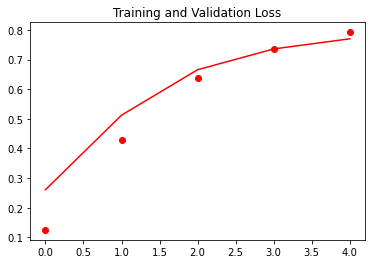

In [244]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='Training Data')
plt.plot(epochs,val_accuracy,'r',label='Validation Data')
plt.title('Training and Validation Loss')

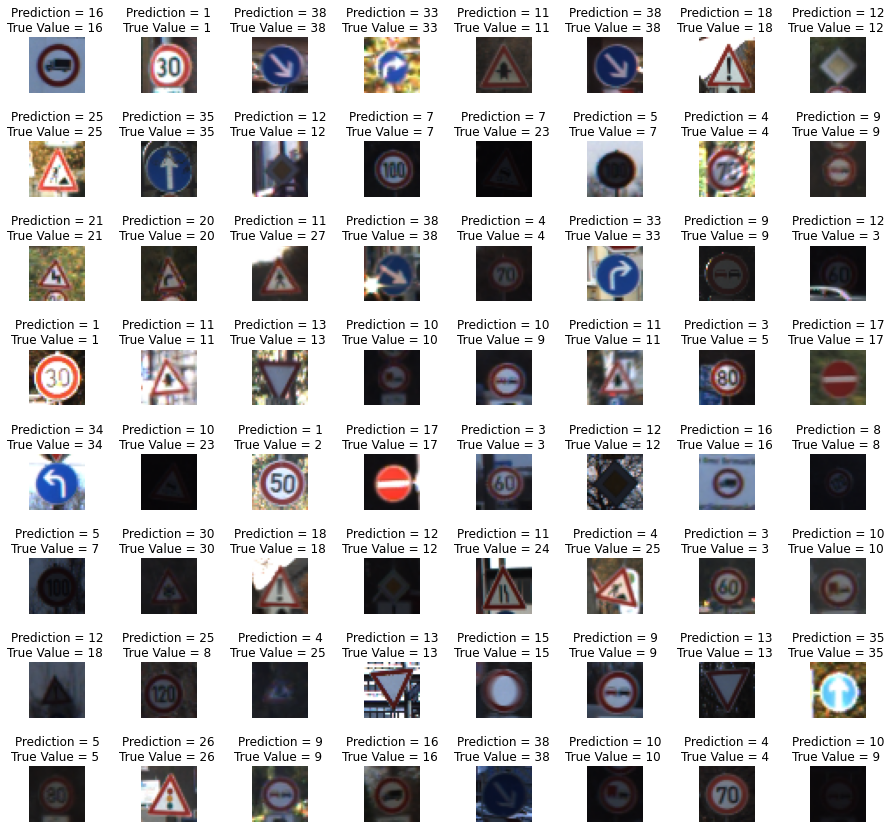

In [248]:

predicted_classes=CNN.predict_classes(X_test)
y_true=y_test


tf.image.grayscale_to_rgb(X_test)
fig,axes=plt.subplots(8,8,figsize=(15,15))
axes=axes.ravel()

for i in np.arange(0,64):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\nTrue Value = {} '.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)